In [1]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, Dataset
import os
import matplotlib.pyplot as plt

import helper

In [2]:
path = "../data/corruptmnist"

In [3]:
test_files = ["\\".join([path,os.listdir(path)[0]])]
train_files = ["\\".join([path,x]) for x in os.listdir(path)[1:6]]

In [4]:
print(test_files)

['../data/corruptmnist\\test.npz']


In [5]:
print(train_files)

['../data/corruptmnist\\train_0.npz', '../data/corruptmnist\\train_1.npz', '../data/corruptmnist\\train_2.npz', '../data/corruptmnist\\train_3.npz', '../data/corruptmnist\\train_4.npz']


In [6]:
data_all = {'images': np.empty([0, 28, 28]), 'labels': np.empty([0,])}

train_batch_size = 32

def load_MNIST_files(filenames):
    # We load all .npz in the filenames
    for file in filenames:   
        f = np.load(file)
        
        # We only grab 'images' and 'labels'
        for key in f.files[0:2]:
            data_all[key] = np.concatenate([data_all[key], f[key]], axis = 0)
        
        data = []
        for key in data_all:
            data.append(data_all[key])
    return tuple(data)

class CorruptedMNISTDataset(Dataset):
    def __init__(self, data_files):
        self.data = load_MNIST_files(data_files)

    def __getitem__(self, index):
        return self.data[0][index], self.data[1][index]

    def __len__(self):
        return len(self.data[0])

train_set = CorruptedMNISTDataset(test_files) # there is only one file in train_files, i.e. train_files = ["foo_1"]

In [30]:
test_set = CorruptedMNISTDataset(test_files)

test = np.load(test_files[0])
test['images'].shape

(5000, 28, 28)

In [12]:
train_set.data

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [7]:
train_loader = DataLoader(dataset=train_set,
                          batch_size=train_batch_size,
                          shuffle=True,
                          num_workers=0)

In [8]:
images,labels = next(iter(train_loader))

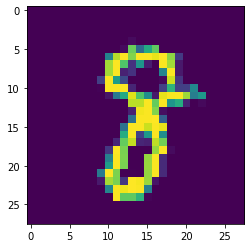

In [9]:
plt.imshow(images[0])

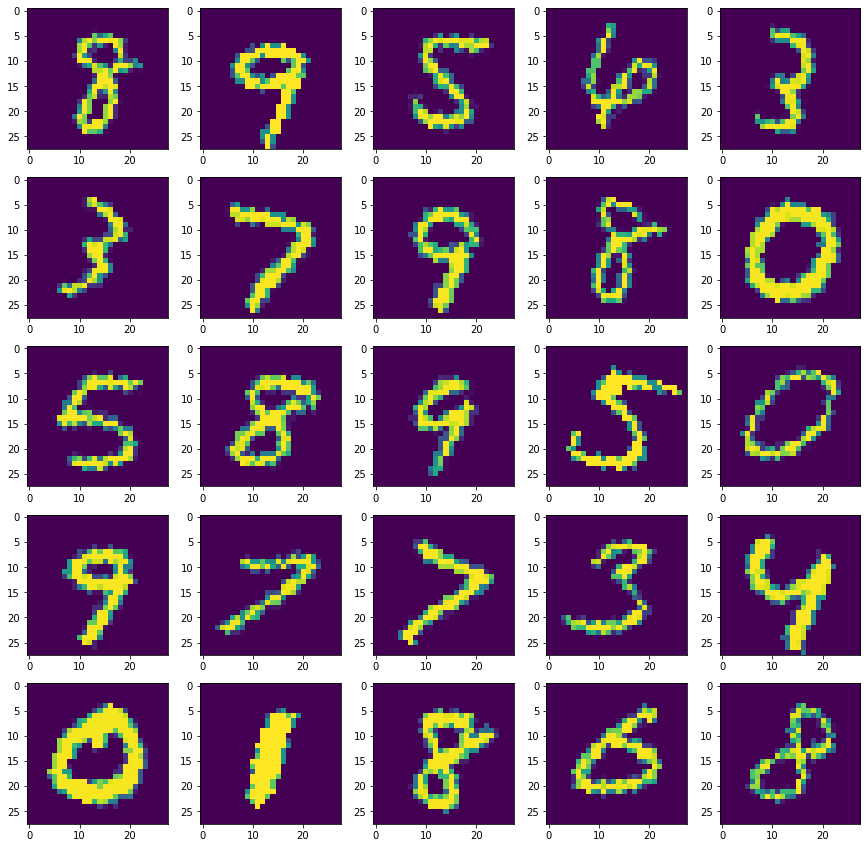

In [10]:
plt.figure(figsize=(15, 15))
size = 5
for i in range(size**2):
    plt.subplot(size, size, i + 1)
    plt.imshow(images[i])

Some images appears to be rotated.